**Victoria_Wang_CapstoneSprint1_11012024**

**Citation for the dataset UCSD Amazon Reviews' 23:**

@article{hou2024bridging,
  title={Bridging Language and Items for Retrieval and Recommendation},
  author={Hou, Yupeng and Li, Jiacheng and He, Zhankui and Yan, An and Chen, Xiusi and McAuley, Julian},
  journal={arXiv preprint arXiv:2403.03952},
  year={2024}
}

**UCSD Amazon Review'23 dataset was presented in json format, which was converted to csv for exploratory data analysis using the following:**

import pandas as pd
import json 

data = []
with open(filepath, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line.strip()))  # Load each line as a JSON object

BeautyReviewMeta = pd.DataFrame(data)  # Convert the list of dicts into a DataFrame #this is for Item Metadata 

BeautyReview = pd.DataFrame(data)  # Convert the list of dicts into a DataFrame #Repeat for User Reviews 

In [101]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from statsmodels.api import tsa # time series analysis

**Check for high-level information about the Item Metadata, stored as dataframe BeautyReviewMeta.**
1. Data shape and size
2. Column names
3. Data types

In [3]:
#important Item Meta csv
BeautyReviewMeta = pd.read_csv('AmazonBeautyReview_meta.csv')

In [4]:
BeautyReviewMeta.shape

(112590, 15)

In [5]:
BeautyReviewMeta.head()

,Unnamed: 0,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"['Material: 304 Stainless Steel; Brass tip', '...",['The Precision Plunger Bars are designed to w...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


"Item Metadata" csv contains useful information about the item itself. Depending on the insighsts from the EDA of the "User Review" csv, we can join the "Item Metadata" and "User Review" csv via the `parent_asin` or parent ID. 

In [6]:
BeautyReviewMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       112590 non-null  int64  
 1   main_category    112590 non-null  object 
 2   title            112578 non-null  object 
 3   average_rating   112590 non-null  float64
 4   rating_number    112590 non-null  int64  
 5   features         112590 non-null  object 
 6   description      112590 non-null  object 
 7   price            17704 non-null   float64
 8   images           112590 non-null  object 
 9   videos           112590 non-null  object 
 10  store            101246 non-null  object 
 11  categories       112590 non-null  object 
 12  details          112590 non-null  object 
 13  parent_asin      112590 non-null  object 
 14  bought_together  0 non-null       float64
dtypes: float64(3), int64(2), object(10)
memory usage: 12.9+ MB


In [7]:
BeautyReviewMeta["categories"].info

<bound method Series.info of 0         []
1         []
2         []
3         []
4         []
          ..
112585    []
112586    []
112587    []
112588    []
112589    []
Name: categories, Length: 112590, dtype: object>

In [8]:
BeautyReviewMeta["categories"].isnull().mean()

0.0

In [9]:
BeautyReviewMeta["categories"].duplicated().mean()

0.9999911182165379

1. Column `bought together` is empty.
2. Column `categories` is filled with [ ], none useful information.

**Check for high-level information about the User Reviews, stored as dataframe BeautyReview.**
1. Data shape and size
2. Column names
3. Data types

In [10]:
#important User Review csv
BeautyReview = pd.read_csv('AmazonBeautyReview.csv')

In [11]:
BeautyReview.shape #there are 701528 rows x 11 columns in the beauty review category

(701528, 11)

In [12]:
BeautyReview.info() #no null data on first inspection since all columns with 701528 entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         701528 non-null  int64  
 1   rating             701528 non-null  float64
 2   title              701368 non-null  object 
 3   text               701316 non-null  object 
 4   images             701528 non-null  object 
 5   asin               701528 non-null  object 
 6   parent_asin        701528 non-null  object 
 7   user_id            701528 non-null  object 
 8   timestamp          701528 non-null  int64  
 9   helpful_vote       701528 non-null  int64  
 10  verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 54.2+ MB


In [13]:
BeautyReview.head 

<bound method NDFrame.head of         Unnamed: 0  rating                                      title  \
0                0     5.0  Such a lovely scent but not overpowering.   
1                1     4.0     Works great but smells a little weird.   
2                2     5.0                                       Yes!   
3                3     1.0                          Synthetic feeling   
4                4     5.0                                         A+   
...            ...     ...                                        ...   
701523      701523     4.0                                 Four Stars   
701524      701524     1.0                                     Pretty   
701525      701525     5.0                       Great sunless tanner   
701526      701526     5.0              The Crown on top is a Ring!!!   
701527      701527     4.0                   Good Shampoo/Conditioner   

                                                     text images        asin  \
0       This 

Column `image` is similar to `categories` from BeautyReviewMeta, full of []. 

**BeautyReview and BeautyReviewMeta will be merged based on column `parent_asin`**

In [14]:
df_all = pd.merge (BeautyReview, BeautyReviewMeta, on ='parent_asin')

In [15]:
df_all.head(5)

,Unnamed: 0_x,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,...,384,[],"['If given the choice, weÕd leave most telltal...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN
1,1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,...,56,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN
2,2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,...,699,"['Same Great Product, NEW PACKAGING.', 'MOISTU...",['New Road Beauty Paraffin Wax is recommended ...,21.98,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN
3,3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,...,1,['?Hair Bundle Material?:Brazilian Virgin Huma...,"[""Hair Material: Brazilian Virgin Human Hair B...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN
4,4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,...,20,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN


In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0_x       701528 non-null  int64  
 1   rating             701528 non-null  float64
 2   title_x            701368 non-null  object 
 3   text               701316 non-null  object 
 4   images_x           701528 non-null  object 
 5   asin               701528 non-null  object 
 6   parent_asin        701528 non-null  object 
 7   user_id            701528 non-null  object 
 8   timestamp          701528 non-null  int64  
 9   helpful_vote       701528 non-null  int64  
 10  verified_purchase  701528 non-null  bool   
 11  Unnamed: 0_y       701528 non-null  int64  
 12  main_category      701528 non-null  object 
 13  title_y            701444 non-null  object 
 14  average_rating     701528 non-null  float64
 15  rating_number      701528 non-null  int64  
 16  fe

In [17]:
df_all.shape

(701528, 25)

**Select out columns of interest from df_all to df_all_selected, which include the following:**

**From User Reviews: df BeautyReview : 'AmazonBeautyReview.csv'**
1. `user_id` : ID of reviewer --> 1) No demographic data to do customer segmentation. This serves as unique reviewer identifier. 
2. `rating` : Rating from of product from 1.0 to 5.0 --> 1) Convert float to integer 2) Convert rating to sentiment buckets 
3. `title_x` : Title of the user review --> 1) Assess the relationship between the title & rating? How does that compare w/ text & rating?
4. `text` : Text body of the user review --> 1) Assess the relationship between the title & rating? How does that compare w/ text & rating?
5. `timestamp` : Time of review in unix time -->1) Convert to datetime (new column name `time` & set it as the index) to assess how other variables change with time. Break down the `time` into `Year`, `Month` and `Week of Year`.
6. `verified_purchase` : User purchase verification --> 1) Assess the distribution of other variable per yes or no purchase verification. 
7. `helpful_vote` : Reviews that are voted to be helpful --> 1) Assess the relationship between variables and if the review is helpful. 

**From Item Metadata: df BeautyReviewMeta : 'AmazonBeautyReview_meta.csv'**
1. `average_rating` : Rating of product shown on the product page. 
2. `price`: Price of product in US dollars (at time of crawling or scraping) 
3. `rating_number`: Number of ratings given for the product 


In [18]:
df_all_selected = df_all[['user_id', 'rating', 'text','timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'title_x', 'average_rating', 'price', 'rating_number']]

In [19]:
df_all_selected.head(5)

,user_id,rating,text,timestamp,verified_purchase,helpful_vote,parent_asin,title_x,average_rating,price,rating_number
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,5.0,This spray is really nice. It smells really go...,1588687728923,True,0,B00YQ6X8EO,Such a lovely scent but not overpowering.,4.3,NaN,384
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,4.0,"This product does what I need it to do, I just...",1588615855070,True,1,B081TJ8YS3,Works great but smells a little weird.,4.0,NaN,56
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,5.0,"Smells good, feels great!",1589665266052,True,2,B097R46CSY,Yes!,4.4,21.98,699
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1.0,Felt synthetic,1643393630220,True,0,B09JS339BZ,Synthetic feeling,1.0,NaN,1
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,5.0,Love it,1609322563534,True,0,B08BZ63GMJ,A+,3.5,NaN,20


**Handling column `timestamp`:**
1. Convert timestamp, time of review in unixtime into into datetime format and create a new column `time`.
2. Convert column `time` into `Year`, `Month` and `Week of Year`.


In [20]:
from datetime import datetime

In [21]:
df_all_selected['time'] = pd.to_datetime(df_all_selected['timestamp'], unit = 'ms')

In [22]:
df_all_selected.head(5)

,user_id,rating,text,timestamp,verified_purchase,helpful_vote,parent_asin,title_x,average_rating,price,rating_number,time
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,5.0,This spray is really nice. It smells really go...,1588687728923,True,0,B00YQ6X8EO,Such a lovely scent but not overpowering.,4.3,NaN,384,2020-05-05 14:08:48.923
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,4.0,"This product does what I need it to do, I just...",1588615855070,True,1,B081TJ8YS3,Works great but smells a little weird.,4.0,NaN,56,2020-05-04 18:10:55.070
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,5.0,"Smells good, feels great!",1589665266052,True,2,B097R46CSY,Yes!,4.4,21.98,699,2020-05-16 21:41:06.052
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1.0,Felt synthetic,1643393630220,True,0,B09JS339BZ,Synthetic feeling,1.0,NaN,1,2022-01-28 18:13:50.220
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,5.0,Love it,1609322563534,True,0,B08BZ63GMJ,A+,3.5,NaN,20,2020-12-30 10:02:43.534


In [23]:
df_all_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            701528 non-null  object        
 1   rating             701528 non-null  float64       
 2   text               701316 non-null  object        
 3   timestamp          701528 non-null  int64         
 4   verified_purchase  701528 non-null  bool          
 5   helpful_vote       701528 non-null  int64         
 6   parent_asin        701528 non-null  object        
 7   title_x            701368 non-null  object        
 8   average_rating     701528 non-null  float64       
 9   price              185623 non-null  float64       
 10  rating_number      701528 non-null  int64         
 11  time               701528 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [24]:
df_all_selected['year'] = df_all_selected['time'].dt.year

In [25]:
df_all_selected['month'] = df_all_selected['time'].dt.month

In [26]:
df_all_selected['week_of_year'] = df_all_selected['time'].dt.isocalendar().week

In [27]:
df_all_selected.head(5)

,user_id,rating,text,timestamp,verified_purchase,helpful_vote,parent_asin,title_x,average_rating,price,rating_number,time,year,month,week_of_year
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,5.0,This spray is really nice. It smells really go...,1588687728923,True,0,B00YQ6X8EO,Such a lovely scent but not overpowering.,4.3,NaN,384,2020-05-05 14:08:48.923,2020,5,19
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,4.0,"This product does what I need it to do, I just...",1588615855070,True,1,B081TJ8YS3,Works great but smells a little weird.,4.0,NaN,56,2020-05-04 18:10:55.070,2020,5,19
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,5.0,"Smells good, feels great!",1589665266052,True,2,B097R46CSY,Yes!,4.4,21.98,699,2020-05-16 21:41:06.052,2020,5,20
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1.0,Felt synthetic,1643393630220,True,0,B09JS339BZ,Synthetic feeling,1.0,NaN,1,2022-01-28 18:13:50.220,2022,1,4
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,5.0,Love it,1609322563534,True,0,B08BZ63GMJ,A+,3.5,NaN,20,2020-12-30 10:02:43.534,2020,12,53


**Create a new column `sentiment` using `rating` where a rating of >= 3 is positive as indicated by 1, <3 is negative as indicated by 0.**

In [28]:
df_all_selected["sentiment"] = (df_all_selected["rating"] >= 3).astype(int)

In [29]:
df_all_selected["sentiment"]

0         1
1         1
2         1
3         0
4         1
         ..
701523    1
701524    0
701525    1
701526    1
701527    1
Name: sentiment, Length: 701528, dtype: int64

In [30]:
df_all_selected['helpful_vote'].unique()

array([  0,   1,   2, 430,   4,   3,   8,   5,  13,   6,  16,   9,   7,
        49,  11,  15,  58,  24,  20,  34,  10,  21,  50,  19,  52,  23,
        14,  38,  18,  40,  36,  31,  30,  22,  37,  43,  29,  51, 120,
        47,  32,  12,  33,  17,  92,  42,  41,  63,  27,  28,  25, 133,
        57,  26,  64,  71,  35, 114,  89,  53, 101,  60,  72,  45,  46,
       419,  59, 117,  44,  65,  39,  74,  99,  56,  54,  48,  69,  75,
       178,  55,  67, 111, 150, 143,  73,  79, 148, 177,  80, 266, 154,
        86,  66,  95,  81, 165, 140, 171,  76,  85,  62, 113,  61, 404,
       166, 124, 118,  90, 607, 315,  70,  88, 112, 426, 102, 158, 145,
       129,  98, 107, 109,  78, 185, 314, 187, 123, 155, 142, 126, 218,
       127, 104, 172, 147, 331, 106,  68, 141, 159, 175, 173, 241, 135,
       646, 119, 151, 149,  83,  82, 136, 134, 132,  93, 121, 594, 399,
       389, 473, 351, 467, 435, 354, 234, 519,  94, 131, 181, 103, 105,
       431, 100, 190,  77, 138, 367, 197, 125, 152, 244, 409, 24

In [31]:
df_all_selected['average_rating'].unique()

array([4.3, 4. , 4.4, 1. , 3.5, 3.8, 3.1, 4.5, 3.3, 4.2, 3.7, 4.1, 3.4,
       3.9, 3.2, 5. , 3. , 4.6, 2.7, 3.6, 4.8, 4.7, 2.5, 2.9, 2.6, 2.8,
       4.9, 1.8, 2.1, 2. , 2.3, 2.4, 2.2, 1.4, 1.5, 1.6, 1.9, 1.7, 1.3,
       1.2, 1.1])

From df_all_selected.info(), we can see that `Price` has lots of null value, both `text` and `title_x` have a small number of null values. 

In [32]:
df_all_selected["price"].isnull().sum()

515905

In [33]:
df_all_selected["price"].isnull().mean()*100 

73.5401865641856

73.5% of `price` data is made of null value. We can potentially subset the available 26.5% price data to assess the relationship between price and other variables given that 26.5% of 701,528 = ~185k rows, which is still >100K, a solid dataset. 

In [34]:
df_all_selected = df_all_selected.dropna(subset=['price'])

In [35]:
df_all_selected["price"].isnull().mean()*100 #all nulls in the price is dropped

0.0

In [36]:
df_all_selected.shape

(185623, 16)

In [37]:
df_all_selected["text"].isnull().sum()

70

In [38]:
df_all_selected["text"].isnull().mean()*100

0.037710844022561855

In [39]:
#Given that it is only 0.03% of the data, we will drop the nulls in column text.
df_all_selected = df_all_selected.dropna(subset=['text'])

In [40]:
df_all_selected["text"].isnull().mean()*100 #all nulls in the text is dropped

0.0

In [41]:
df_all_selected["title_x"].isnull().sum()

30

In [42]:
df_all_selected["title_x"].isnull().mean()*100

0.016167887342161

In [43]:
#Given that it is only 0.02% of the data, we will drop the nulls in column title_x.
df_all_selected = df_all_selected.dropna(subset=['title_x'])

In [44]:
df_all_selected["title_x"].isnull().mean()*100 #all nulls in the title_x is dropped

0.0

**Convert variables with datatype float to integers. They include: `rating`, `average_rating`, `price`**

In [45]:
df_all_selected[['rating','average_rating','price']] = df_all_selected[['rating','average_rating','price']].astype(int)

In [46]:
df_all_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185523 entries, 2 to 701527
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            185523 non-null  object        
 1   rating             185523 non-null  int64         
 2   text               185523 non-null  object        
 3   timestamp          185523 non-null  int64         
 4   verified_purchase  185523 non-null  bool          
 5   helpful_vote       185523 non-null  int64         
 6   parent_asin        185523 non-null  object        
 7   title_x            185523 non-null  object        
 8   average_rating     185523 non-null  int64         
 9   price              185523 non-null  int64         
 10  rating_number      185523 non-null  int64         
 11  time               185523 non-null  datetime64[ns]
 12  year               185523 non-null  int32         
 13  month              185523 non-null  int32        

In [47]:
df_all_selected.isnull().mean()*100 #check there is no more nulls in the df

user_id              0.0
rating               0.0
text                 0.0
timestamp            0.0
verified_purchase    0.0
helpful_vote         0.0
parent_asin          0.0
title_x              0.0
average_rating       0.0
price                0.0
rating_number        0.0
time                 0.0
year                 0.0
month                0.0
week_of_year         0.0
sentiment            0.0
dtype: float64

In [48]:
df_all_selected.isnull().sum() #check there is no more nulls in the df

user_id              0
rating               0
text                 0
timestamp            0
verified_purchase    0
helpful_vote         0
parent_asin          0
title_x              0
average_rating       0
price                0
rating_number        0
time                 0
year                 0
month                0
week_of_year         0
sentiment            0
dtype: int64

In [49]:
df_all_selected.duplicated().sum()

1914

In [50]:
df_all_selected.duplicated().mean()*100

1.0316780129687424

This shows there was 1914 duplicated rows in the dataset, making up 1.03% of the data. Since it is a small percentage of the dataset, dropping those duplicated rows will unlikely affect the overall distribution of the data. 

In [51]:
df_all_selected=df_all_selected.drop_duplicates()

In [52]:
df_all_selected.duplicated().mean()*100 #check all duplicates are dropped

0.0

In [53]:
df_all_selected.describe()

,rating,timestamp,helpful_vote,average_rating,price,rating_number,time,year,month,week_of_year,sentiment
count,183609.000000,1.836090e+05,183609.000000,183609.000000,183609.000000,183609.000000,183609,183609.000000,183609.00000,183609.0,183609.000000
mean,4.110899,1.566344e+12,1.121655,3.821065,21.898551,1336.045167,2019-08-20 23:27:41.324712448,2019.153663,6.29559,25.582041,0.826370
min,1.000000,1.065643e+12,0.000000,1.000000,0.000000,1.000000,2003-10-08 19:51:53,2003.000000,1.00000,1.0,0.000000
25%,4.000000,1.512070e+12,0.000000,4.000000,9.000000,71.000000,2017-11-30 19:27:25.931000064,2017.000000,3.00000,12.0,1.000000
50%,5.000000,1.581625e+12,0.000000,4.000000,15.000000,337.000000,2020-02-13 20:24:12.932999936,2020.000000,6.00000,25.0,1.000000
75%,5.000000,1.627603e+12,1.000000,4.000000,24.000000,1483.000000,2021-07-29 23:51:36.068999936,2021.000000,9.00000,38.0,1.000000
max,5.000000,1.694220e+12,594.000000,5.000000,2548.000000,30206.000000,2023-09-09 00:39:36.666000,2023.000000,12.00000,53.0,1.000000
std,1.419246,8.019212e+10,7.380472,0.461146,30.907738,2312.975580,NaN,2.560835,3.46353,15.150604,0.378792


In [54]:
df_all_selected.describe().T

,count,mean,min,25%,50%,75%,max,std
rating,183609.0,4.110899,1.0,4.0,5.0,5.0,5.0,1.419246
timestamp,183609.0,1566343661324.712402,1065642713000.0,1512070045931.0,1581625452933.0,1627602696069.0,1694219976666.0,80192122804.88208
helpful_vote,183609.0,1.121655,0.0,0.0,0.0,1.0,594.0,7.380472
average_rating,183609.0,3.821065,1.0,4.0,4.0,4.0,5.0,0.461146
price,183609.0,21.898551,0.0,9.0,15.0,24.0,2548.0,30.907738
rating_number,183609.0,1336.045167,1.0,71.0,337.0,1483.0,30206.0,2312.97558
time,183609,2019-08-20 23:27:41.324712448,2003-10-08 19:51:53,2017-11-30 19:27:25.931000064,2020-02-13 20:24:12.932999936,2021-07-29 23:51:36.068999936,2023-09-09 00:39:36.666000,NaN
year,183609.0,2019.153663,2003.0,2017.0,2020.0,2021.0,2023.0,2.560835
month,183609.0,6.29559,1.0,3.0,6.0,9.0,12.0,3.46353
week_of_year,183609.0,25.582041,1.0,12.0,25.0,38.0,53.0,15.150604


In [55]:
df_all_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183609 entries, 2 to 701527
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            183609 non-null  object        
 1   rating             183609 non-null  int64         
 2   text               183609 non-null  object        
 3   timestamp          183609 non-null  int64         
 4   verified_purchase  183609 non-null  bool          
 5   helpful_vote       183609 non-null  int64         
 6   parent_asin        183609 non-null  object        
 7   title_x            183609 non-null  object        
 8   average_rating     183609 non-null  int64         
 9   price              183609 non-null  int64         
 10  rating_number      183609 non-null  int64         
 11  time               183609 non-null  datetime64[ns]
 12  year               183609 non-null  int32         
 13  month              183609 non-null  int32        

In [56]:
#Save df_all_selected into a csv. 
df_all_selected.to_csv('AmazonBeauty_df_all_selected10312024.csv', index=False)

**Preliminary Graphs can be plotted for the following:**

**Continuous variables:**
1. `rating`
2. `helpful_vote`
3. `average_rating`
4. `price`
5. `rating_number`
6. `year`
7. `month`
8. `week_of_year`

**Categorical variables:**
1. `verified_purchase`
2. `sentiment`

Select out the datetime and text variables in order to perform correlations between the numerical and categorical variables.

In [57]:
columns_to_correlate = ['rating', 'helpful_vote', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year', 'verified_purchase', 'sentiment']

In [58]:
df_corr = df_all_selected[columns_to_correlate]  

In [59]:
correlation_matrix = df_corr.corr()

In [60]:
df_corr.corr().style.background_gradient()

,rating,helpful_vote,average_rating,price,rating_number,year,month,week_of_year,verified_purchase,sentiment
rating,1.000000,-0.010280,0.240426,0.016200,0.031569,-0.047797,0.000565,-0.000007,0.010930,0.908052
helpful_vote,-0.010280,1.000000,-0.016295,0.033140,0.014611,-0.055531,0.000366,0.000612,-0.013327,-0.009865
average_rating,0.240426,-0.016295,1.000000,0.016935,0.060390,0.073485,0.001351,0.001544,0.042898,0.214439
price,0.016200,0.033140,0.016935,1.000000,-0.071787,-0.020977,-0.005961,-0.005776,-0.046848,0.012821
rating_number,0.031569,0.014611,0.060390,-0.071787,1.000000,0.002826,-0.009960,-0.009903,0.063928,0.026153
year,-0.047797,-0.055531,0.073485,-0.020977,0.002826,1.000000,-0.123693,-0.121005,0.037251,-0.062644
month,0.000565,0.000366,0.001351,-0.005961,-0.009960,-0.123693,1.000000,0.969634,-0.022669,0.001571
week_of_year,-0.000007,0.000612,0.001544,-0.005776,-0.009903,-0.121005,0.969634,1.000000,-0.024353,0.001185
verified_purchase,0.010930,-0.013327,0.042898,-0.046848,0.063928,0.037251,-0.022669,-0.024353,1.000000,0.002613
sentiment,0.908052,-0.009865,0.214439,0.012821,0.026153,-0.062644,0.001571,0.001185,0.002613,1.000000


It makes sense that `rating` and `sentiment` is highly correlated because `sentiment` is derived from `rating`. It also makes sense that `rating`, `average_rating` and `sentiment` are slightly correlated with one another given that `average_rating` and `sentiment` are derived from `rating`. Also, `week_of_year` and `month` are highly correlated because they are both derived from `time`. 

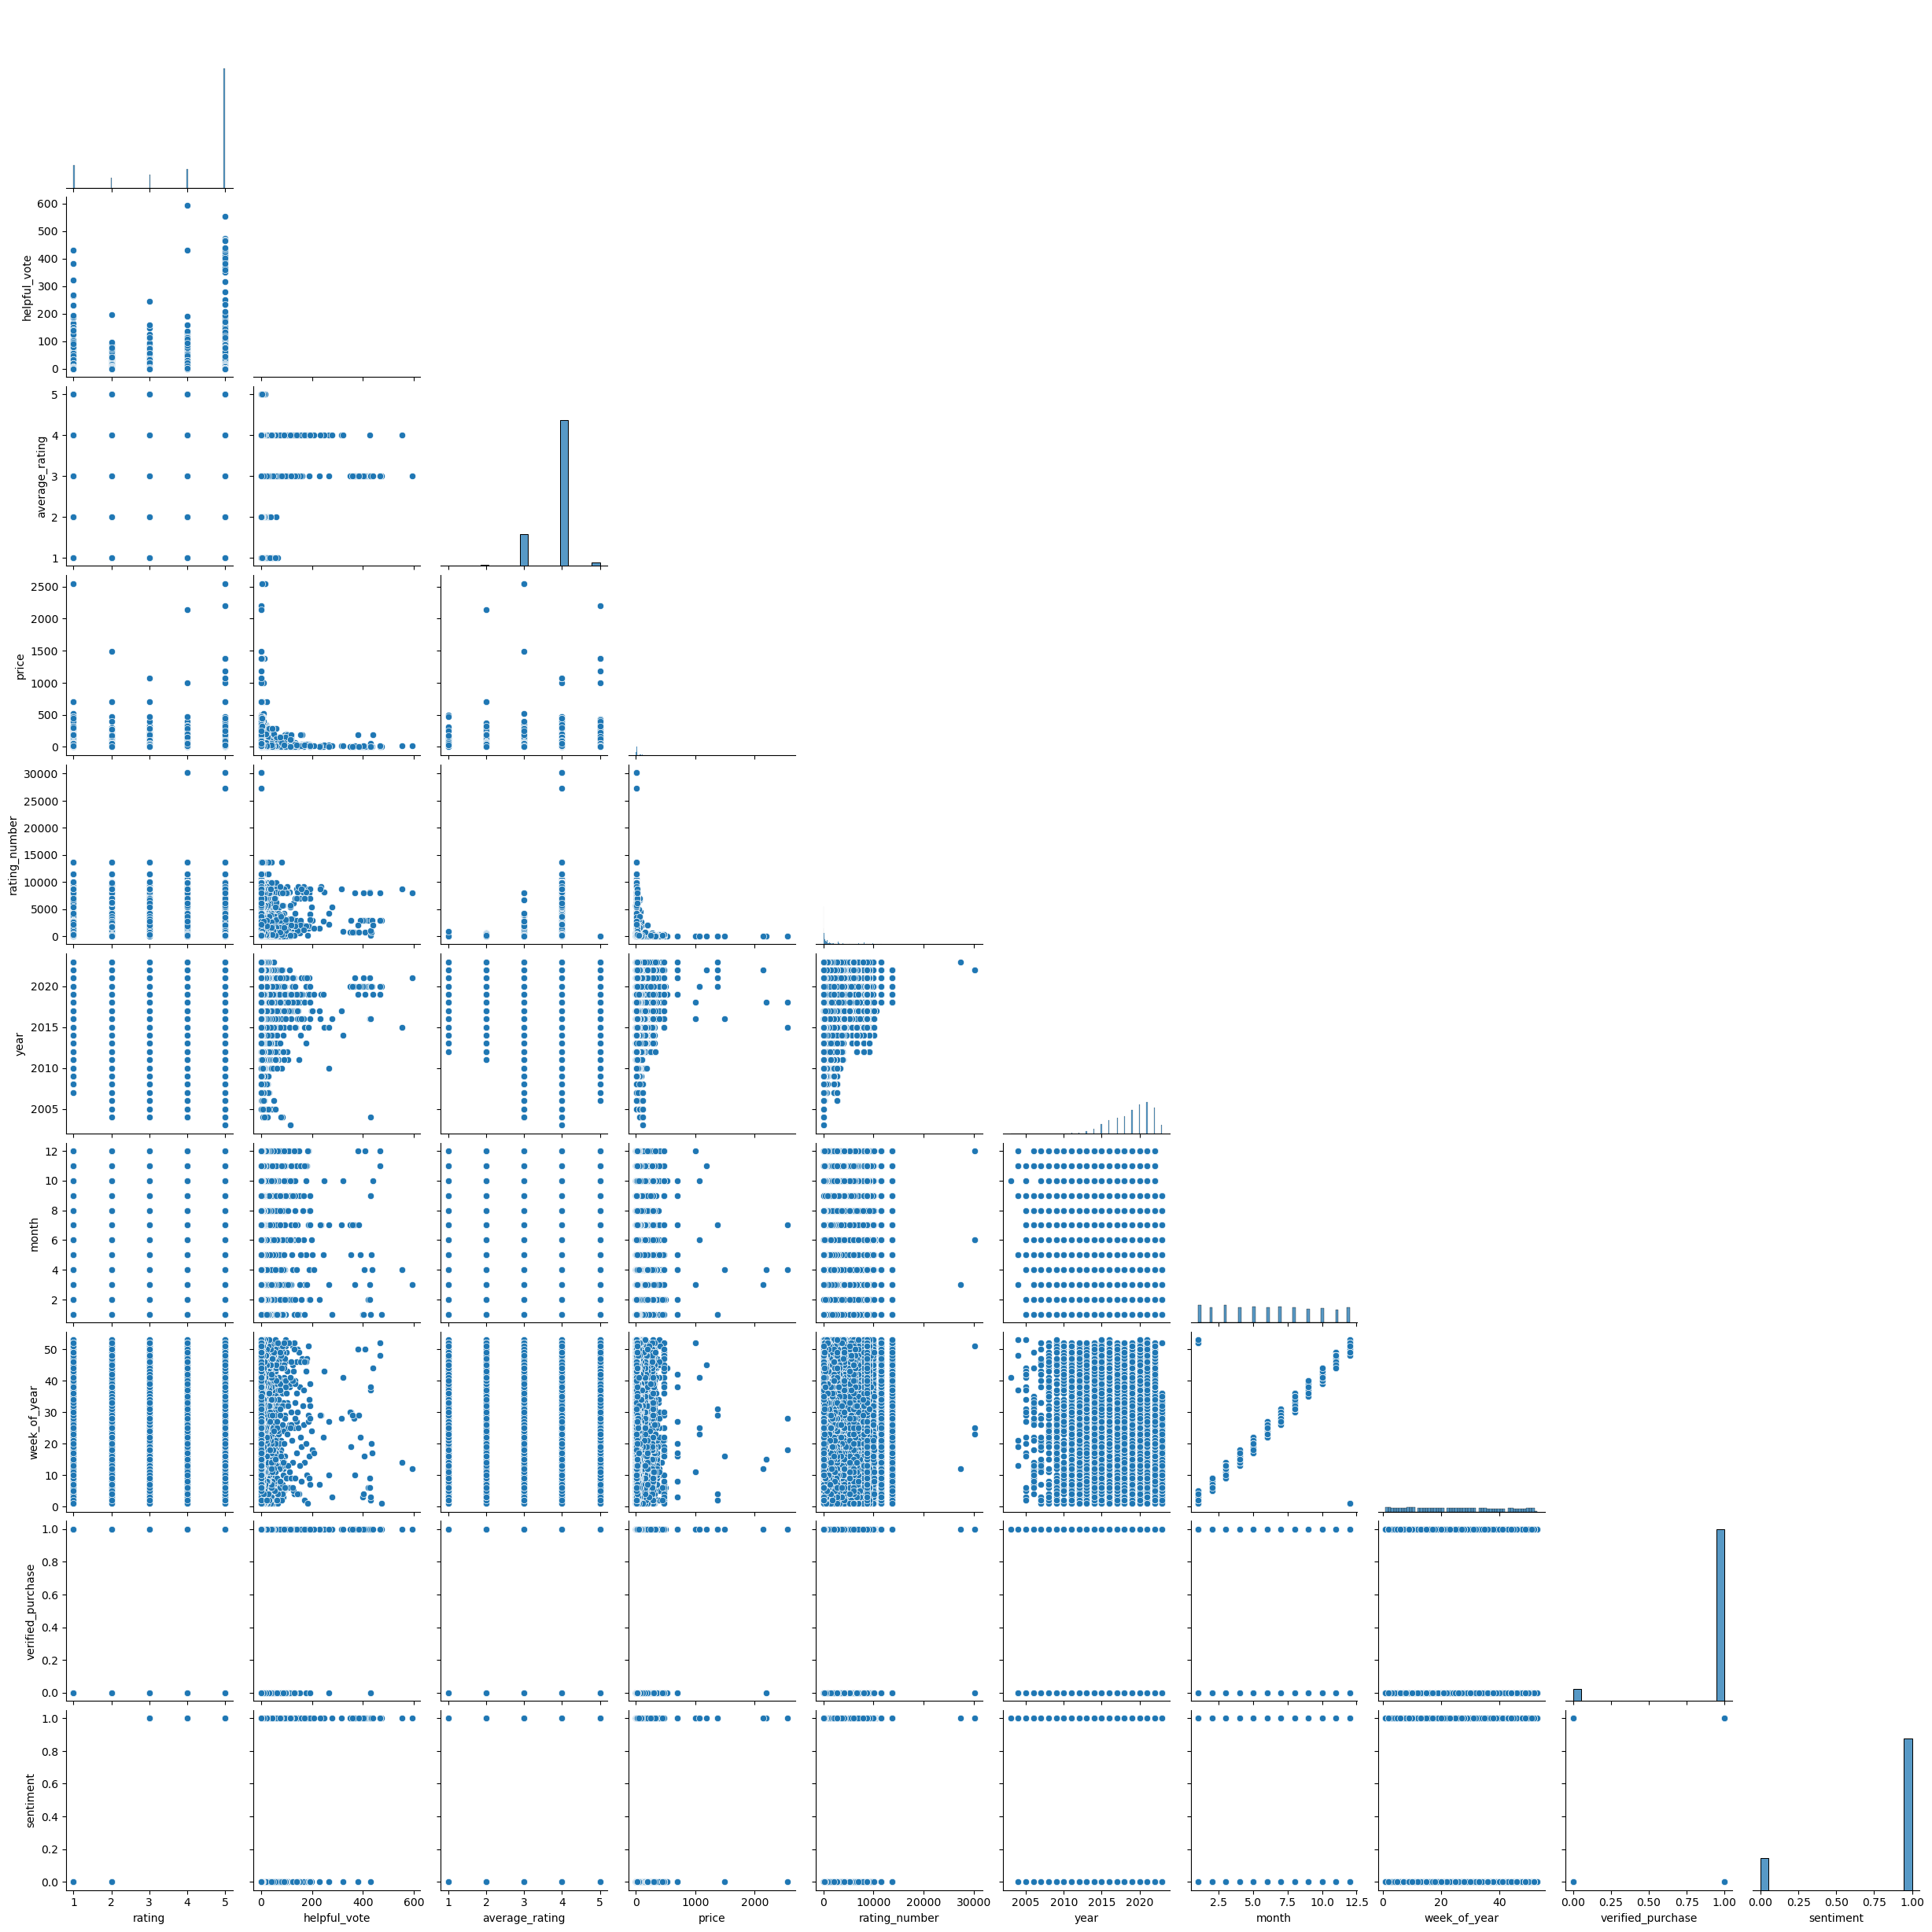

In [61]:
sns.pairplot(df_corr, corner=True)
plt.show()

Some general overview insights:
1. Most of the purchases are verified purchases compared to those that are not.
2. Most review have a positive sentiment (>=3) compared to those that are < 3.

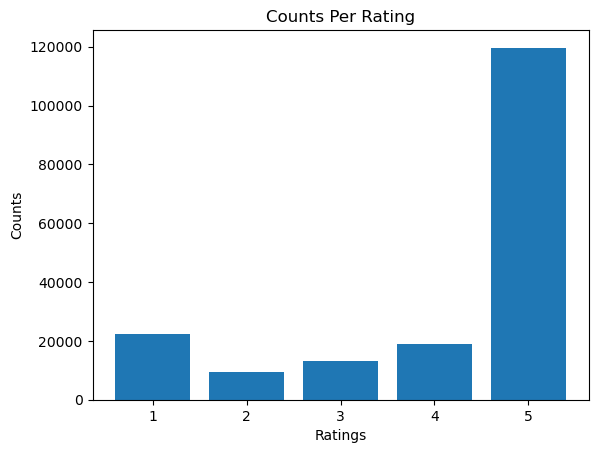

In [62]:
plt.figure()
plt.bar(df_corr['rating'].value_counts().index,
        df_corr['rating'].value_counts().values)
plt.ylabel('Counts')
plt.xlabel('Ratings')
plt.title('Counts Per Rating')
plt.show()

People seemed to be quite satisfied with their purchases in the beauty category, mostly giving a product review of 5.

In [63]:
columns_to_plot = ['rating', 'helpful_vote', 'average_rating', 'price', 'rating_number', 'verified_purchase', 'sentiment']

In [64]:
df_plot = df_all_selected[columns_to_plot]  

ValueError: num must be an integer with 1 <= num <= 6, not 7

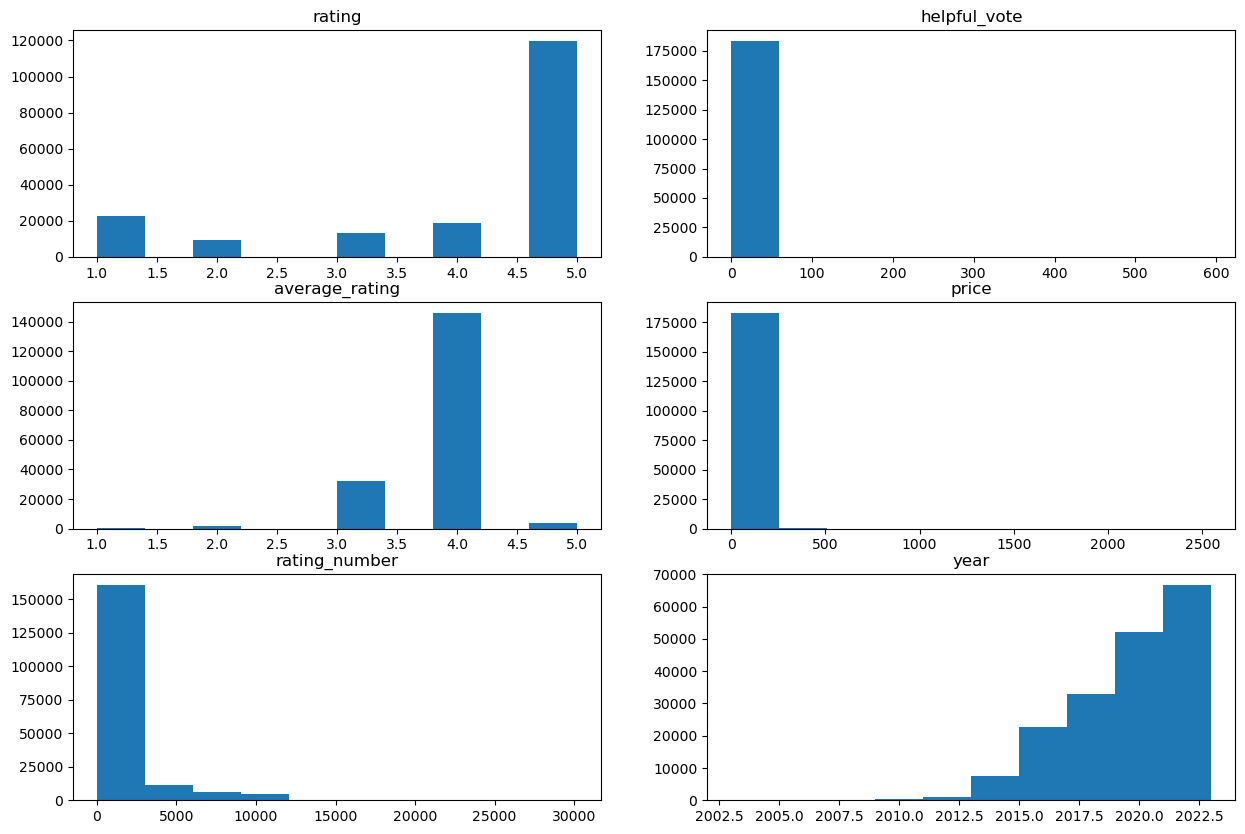

In [65]:
#Create histograms to asses distribution: 

# Creating the plots layout 
plt.subplots(3, 2, figsize=(15, 10))

# Plotting
for subplots, column in enumerate(df_corr.columns, 1):
    plt.subplot(3, 2, subplots)
    plt.hist(df_corr[column])
    plt.title(column)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=1.0)

Similar trends we saw earlier, ratings are skewed towards more positive ratings, customers seemed to quite happy on average with the beauty products. The number of reviews have across across the years, with a dramatic increase after 2017, which was when Amazon launched the "Early Reviewer Program" that incentivized customers with gift cards to leave product reviews. 

Citation for history of Amazon's review ecosystem: 
https://www.forbes.com/sites/kirimasters/2021/03/22/a-short-history-of-amazons-product-review-ecosystem/#:~:text=February%202017:%20Amazon%20launches%20the,without%20actually%20writing%20a%20review.

In [72]:
df_corr['price'].describe() #price of the beauty products has a mean of ~$21.9 and 50% of the product are priced at $15. 

count    183609.000000
mean         21.898551
std          30.907738
min           0.000000
25%           9.000000
50%          15.000000
75%          24.000000
max        2548.000000
Name: price, dtype: float64

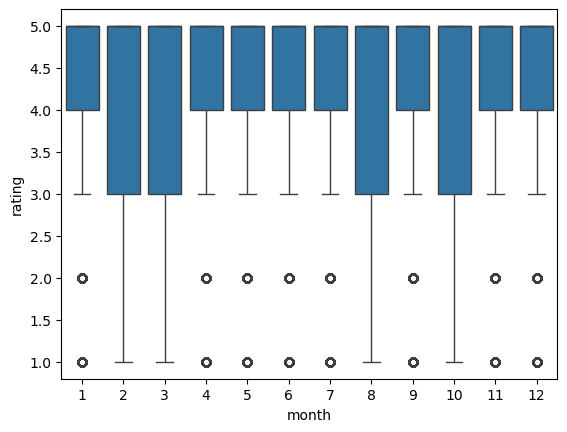

In [73]:
plt.figure()
sns.boxplot(x='month', y='rating', data=df_corr)
plt.show()

Pattern seem pretty consistant in terms of the spread of ratings across specific months (such as month 2,3,8 & 10 vs the rest of the month in the year).

In [74]:
grouped_year = df_corr[["year", "rating"]].groupby("year").mean().reset_index()
grouped_year 

,year,rating
0,2003,5.000000
1,2004,3.857143
2,2005,4.320000
3,2006,4.305556
4,2007,4.617021
5,2008,4.237500
6,2009,4.235294
7,2010,4.011494
8,2011,3.848397
9,2012,4.120166


Text(0, 0.5, 'Average Rating')

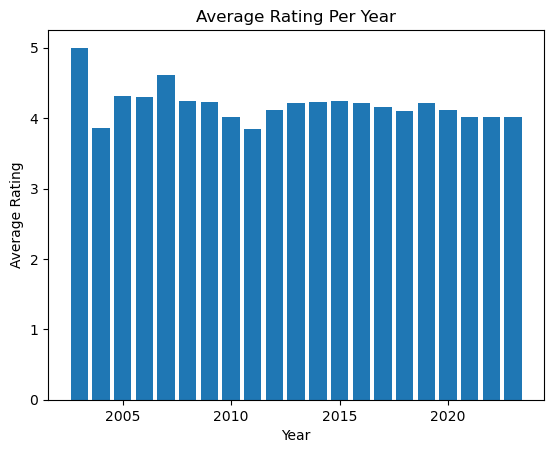

In [75]:
plt.figure
plt.bar(grouped_year["year"], grouped_year["rating"])
plt.title("Average Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

From 2003 to 2023, customer rating of product in the beauty category is quite consistent and good, average at around rating 4. 

In [77]:
grouped_month = df_corr[["month", "rating"]].groupby("month").mean().reset_index()
grouped_month

,month,rating
0,1,4.153629
1,2,4.096166
2,3,4.085816
3,4,4.102798
4,5,4.096583
5,6,4.117588
6,7,4.118742
7,8,4.094219
8,9,4.117542
9,10,4.088895


Text(0, 0.5, 'Average Rating')

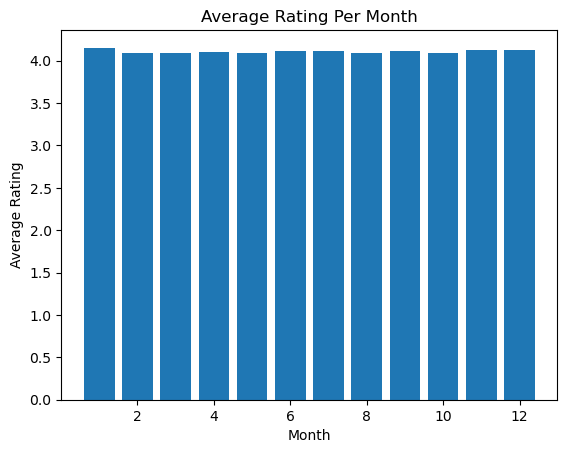

In [79]:
plt.figure
plt.bar(grouped_month["month"], grouped_month["rating"])
plt.title("Average Rating Per Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")

Grouped by months across 2003 to 2023, the average rating is surprisingly consistant across the months of the year. 

**Column `text` and `title_x` will be handled via basic text data analysis methods.**

For this preliminary EDA, we will focused on `text` and `rating` where rating will be grouped into `sentiment` where rating >=3 is positive and <3 is negative. We will assess what are the top 20 most frequently occurring words, and then the top 20 words indicating positive and negative sentiments. 

In [80]:
textanalysis = df_all_selected[["text", "sentiment"]]

In [81]:
textanalysis.head(5)

,text,sentiment
2,"Smells good, feels great!",1
5,The polish was quiet thick and did not apply s...,1
12,I try to get Keratin treatments every 3 months...,1
24,Got my new eyebrows in mail today. Magically ...,1
30,A total waste of money. I get better results ...,0


In [82]:
len(textanalysis[textanalysis["text"].isnull()]) / len(textanalysis) * 100 #there are no nulls 

0.0

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
#following the guide from class noteook Text Data 

In [84]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", max_features=200, ngram_range=(2,2))

# 2. Fit 
bagofwords.fit(textanalysis["text"])

# 3. Transform
small_transformed = bagofwords.transform(textanalysis["text"].fillna(""))
small_transformed

<183609x200 sparse matrix of type '<class 'numpy.int64'>'
	with 136542 stored elements in Compressed Sparse Row format>

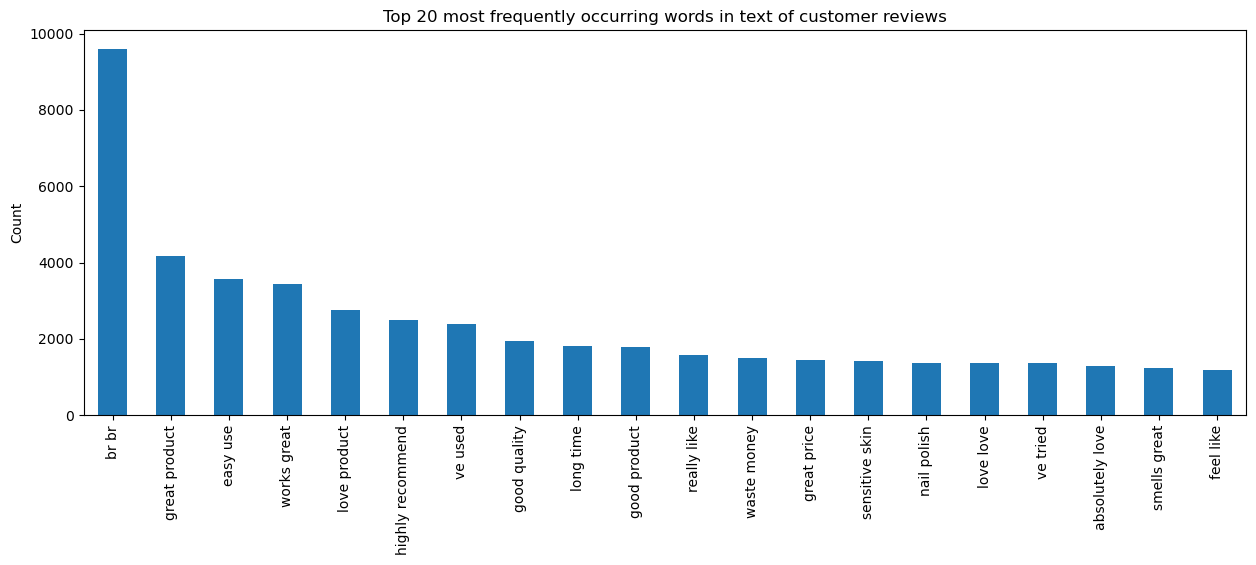

In [85]:
word_counts = pd.DataFrame(
    {"counts": small_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in text of customer reviews")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [86]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(small_transformed, textanalysis["sentiment"])

# Training and test score
print(f"Train score: {logreg.score(small_transformed, textanalysis["sentiment"])}")

Train score: 0.8397954348643041


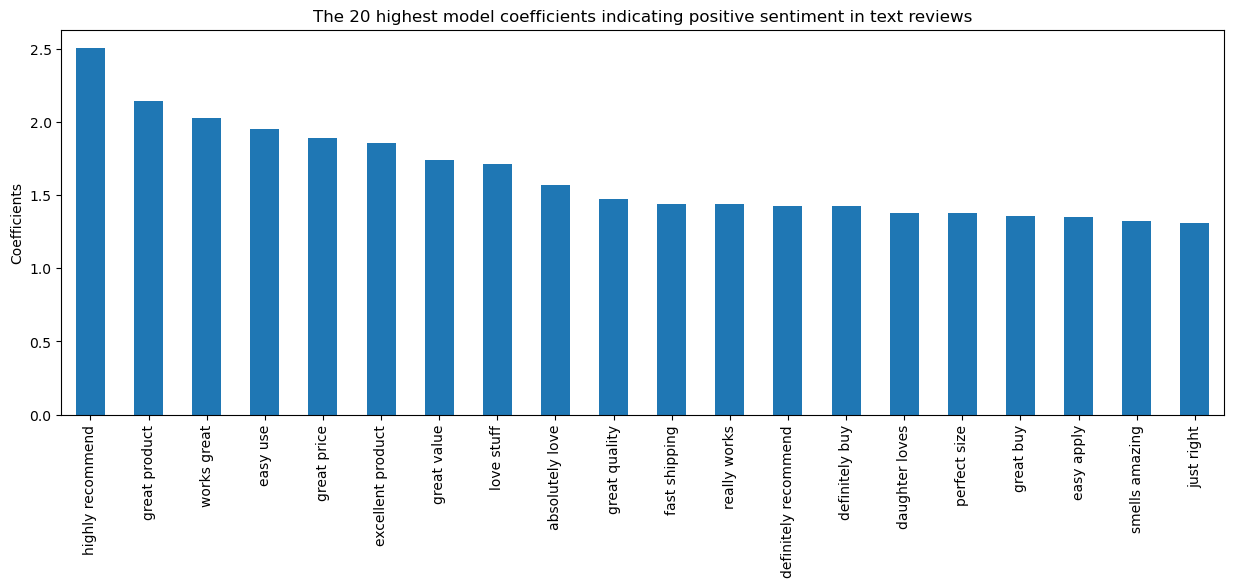

In [87]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

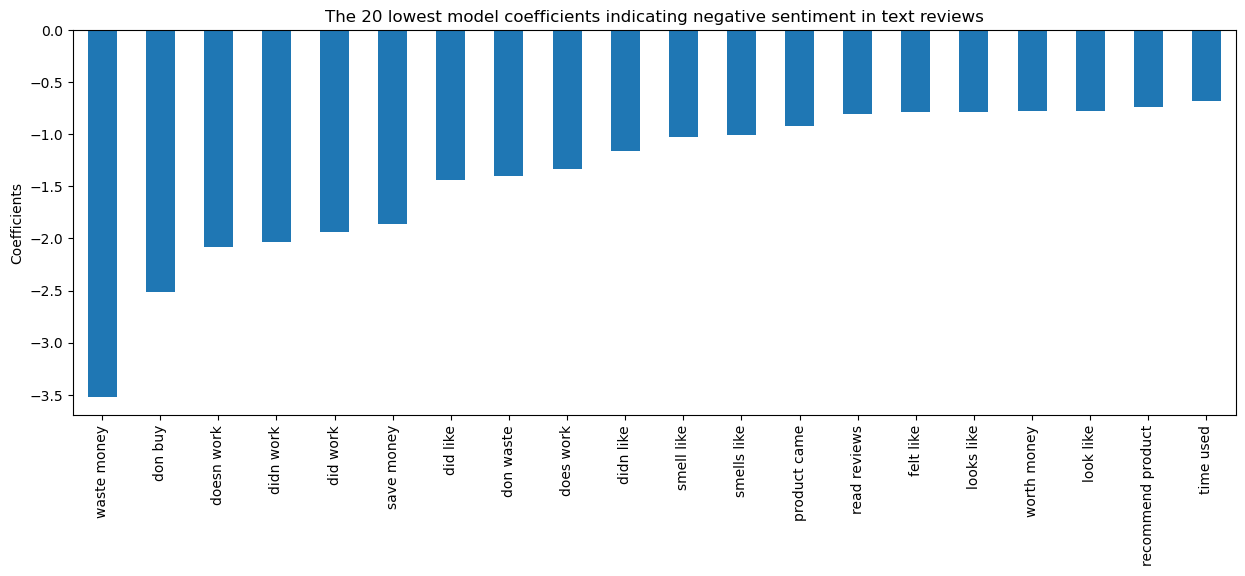

In [88]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

In [89]:
titleanalysis = df_all_selected[["title_x", "sentiment"]]

In [90]:
titleanalysis.head(5)

,title_x,sentiment
2,Yes!,1
5,Pretty Color,1
12,Just ok,1
24,You won’t regret this purchase.,1
30,Ineffective,0


In [91]:
len(titleanalysis[titleanalysis["title_x"].isnull()]) / len(titleanalysis) * 100 #there are no nulls 

0.0

In [92]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(stop_words="english", max_features=200, ngram_range=(2,2))

# 2. Fit 
bagofwords2.fit(titleanalysis["title_x"])

# 3. Transform
small_transformed2 = bagofwords.transform(titleanalysis["title_x"].fillna(""))
small_transformed2

<183609x200 sparse matrix of type '<class 'numpy.int64'>'
	with 35837 stored elements in Compressed Sparse Row format>

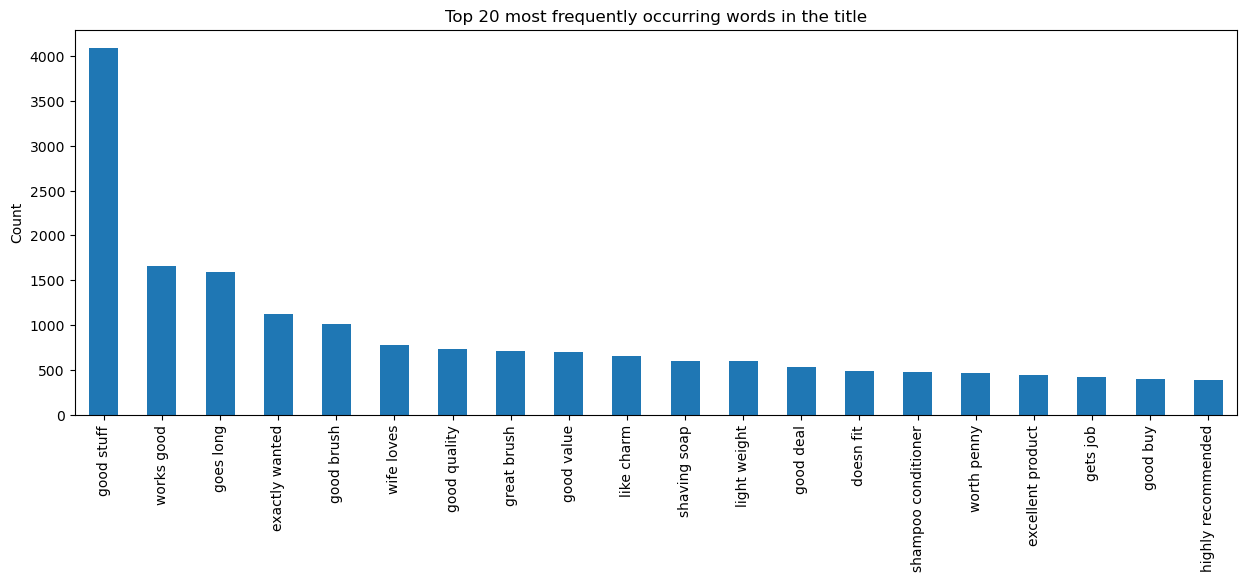

In [93]:
word_counts = pd.DataFrame(
    {"counts": small_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in the title")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [94]:
# Fitting a model
logreg2 = LogisticRegression(C = 0.1)
logreg2.fit(small_transformed2, titleanalysis["sentiment"])

# Training and test score
print(f"Train score: {logreg2.score(small_transformed2, titleanalysis["sentiment"])}")

Train score: 0.8377911758138218


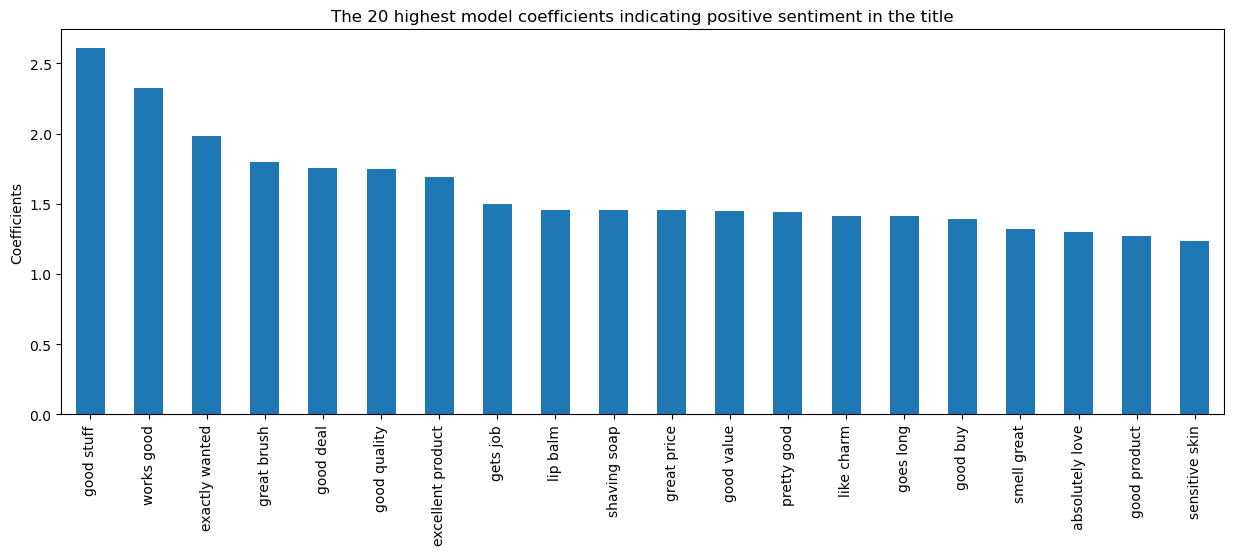

In [95]:
word_counts = pd.DataFrame(
    {"coefficients": logreg2.coef_[0]},
    index=bagofwords2.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment in the title")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

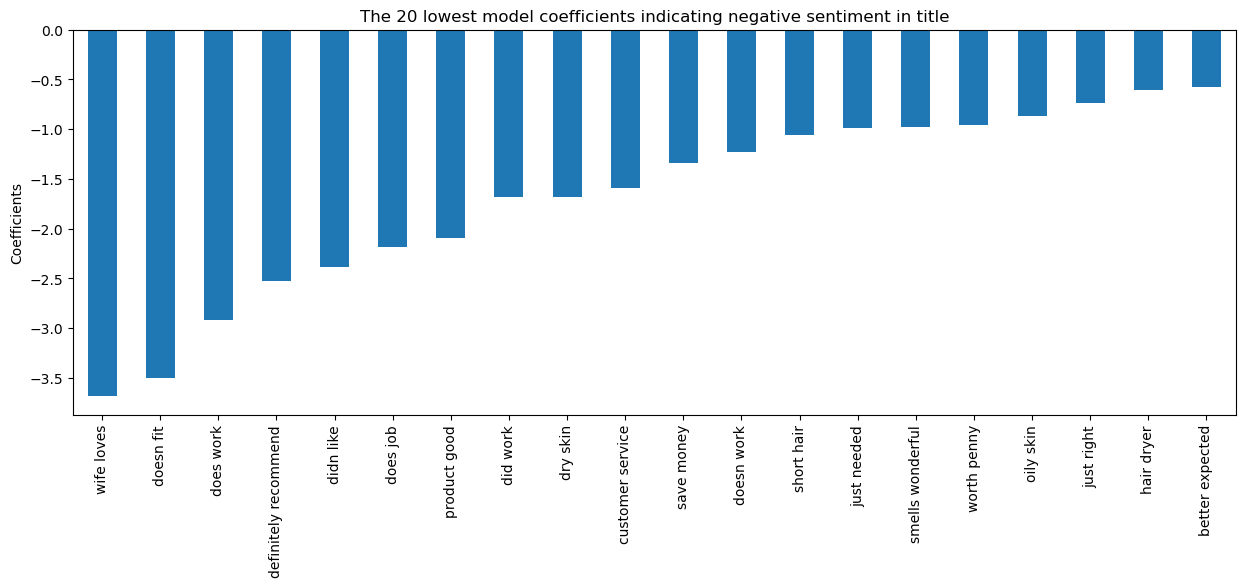

In [96]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment in title")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

As shown, there seemed to be more errors with selecting out the negative sentiments from the title. For example, "definitely recommend" and "smells wonderful" are more likely to belong to a positive sentiment.

**To perform basic time series analysis.**

In [98]:
timeseries = df_all_selected

In [99]:
timeseries=timeseries.set_index("time")
timeseries.head()

,user_id,rating,text,timestamp,verified_purchase,helpful_vote,parent_asin,title_x,average_rating,price,rating_number,year,month,week_of_year,sentiment
time,,,,,,,,,,,,,,,
2020-05-16 21:41:06.052,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,5,"Smells good, feels great!",1589665266052,True,2,B097R46CSY,Yes!,4,21,699,2020,5,20,1
2020-08-27 22:30:08.138,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,4,The polish was quiet thick and did not apply s...,1598567408138,True,0,B00R8DXL44,Pretty Color,3,7,32,2020,8,35,1
2021-04-29 23:05:01.209,AFSKPY37N3C43SOI5IEXEK5JSIYA,3,I try to get Keratin treatments every 3 months...,1619737501209,False,0,B07SLFWZKN,Just ok,3,49,25,2021,4,17,1
2020-01-09 23:19:44.772,AHPUT3ITXCHQJO7OMF74LEMYHIVA,5,Got my new eyebrows in mail today. Magically ...,1578611984772,True,430,B07ZJKVVLW,You won’t regret this purchase.,3,7,2940,2020,1,2,1
2021-05-18 16:55:42.148,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,2,A total waste of money. I get better results ...,1621356942148,True,0,B083BDVS36,Ineffective,4,9,3264,2021,5,20,0


In [100]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183609 entries, 2020-05-16 21:41:06.052000 to 2013-04-26 02:48:06
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            183609 non-null  object
 1   rating             183609 non-null  int64 
 2   text               183609 non-null  object
 3   timestamp          183609 non-null  int64 
 4   verified_purchase  183609 non-null  bool  
 5   helpful_vote       183609 non-null  int64 
 6   parent_asin        183609 non-null  object
 7   title_x            183609 non-null  object
 8   average_rating     183609 non-null  int64 
 9   price              183609 non-null  int64 
 10  rating_number      183609 non-null  int64 
 11  year               183609 non-null  int32 
 12  month              183609 non-null  int32 
 13  week_of_year       183609 non-null  UInt32
 14  sentiment          183609 non-null  int64 
dtypes: UInt32(1), bool(1), int3

In [120]:
timeseries.isna().sum() #confirming there is no missing values so we don't have to consider the common imputing options

user_id              0
rating               0
text                 0
timestamp            0
verified_purchase    0
helpful_vote         0
parent_asin          0
title_x              0
average_rating       0
price                0
rating_number        0
year                 0
month                0
week_of_year         0
sentiment            0
dtype: int64

**Variables that will be used to attempt this basic time series analysis: `rating`, `rating_number`, `helpful_vote`, `average_rating`, `price` and `sentiment`.**

In [113]:
rating_by_year = timeseries.groupby(timeseries.index.year)['rating'].mean()

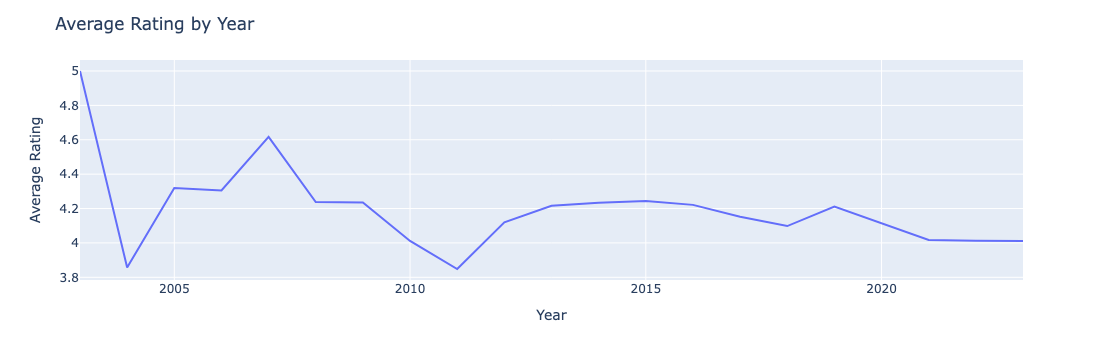

In [115]:
fig = px.line(rating_by_year, x=rating_by_year.index, y="rating",)
fig.update_layout(
    yaxis_title="Average Rating", 
    xaxis_title="Year",
    legend_title="", 
    title="Average Rating by Year"
)
fig.show()

This shows that the average rating peaked in 2007 and drop significantly in 2011, rise again after and stayed hovering around an average rating of 4 since. 

In [133]:
totalrating_by_year = timeseries.groupby(timeseries.index.year)['rating'].sum()

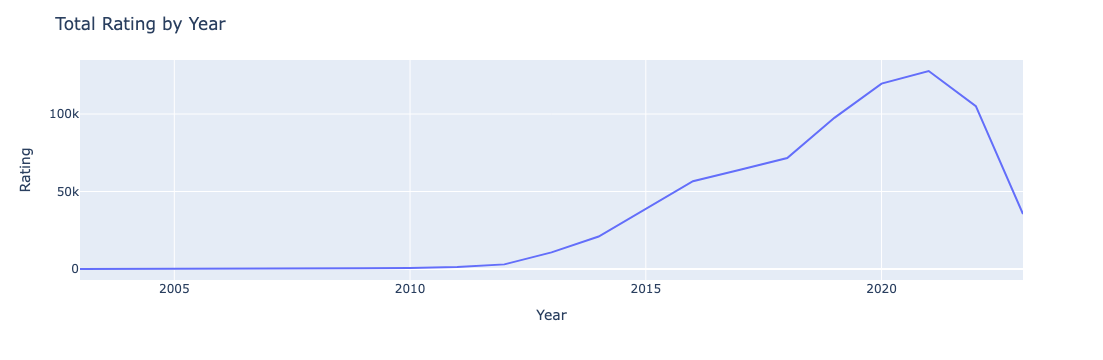

In [134]:
fig = px.line(totalrating_by_year, x=totalrating_by_year.index, y="rating",)
fig.update_layout(
    yaxis_title="Rating", 
    xaxis_title="Year",
    legend_title="", 
    title="Total Rating by Year"
)
fig.show()

Similar to what to discovered above, the number of reviews have across across the years, with a dramatic increase after 2017, which was when Amazon launched the "Early Reviewer Program" that incentivized customers with gift cards to leave product reviews.

In [117]:
rating_by_month = timeseries.groupby(timeseries.index.month)['rating'].mean()

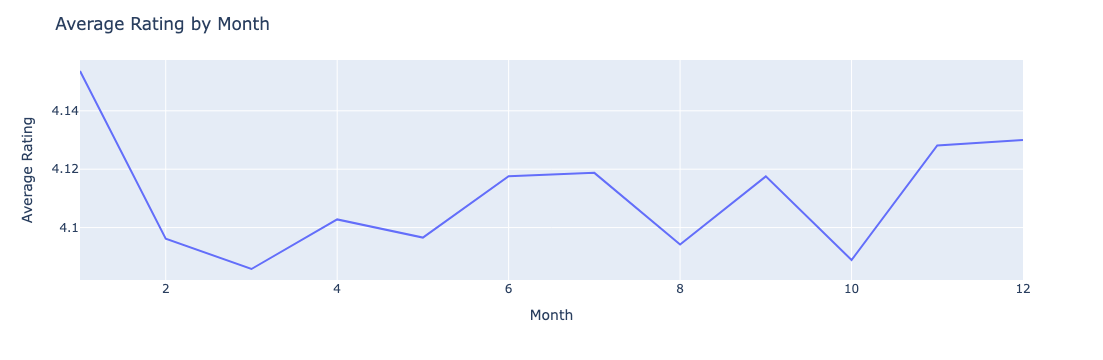

In [118]:
fig = px.line(rating_by_month, x=rating_by_month.index, y="rating",)
fig.update_layout(
    yaxis_title="Average Rating", 
    xaxis_title="Month",
    legend_title="", 
    title="Average Rating by Month"
)
fig.show()

Though there are changes in average ratings across the different months of the year, across the year 2003-2023, the average hover around a rating of 4.

In [121]:
price_by_month = timeseries.groupby(timeseries.index.month)['price'].mean()

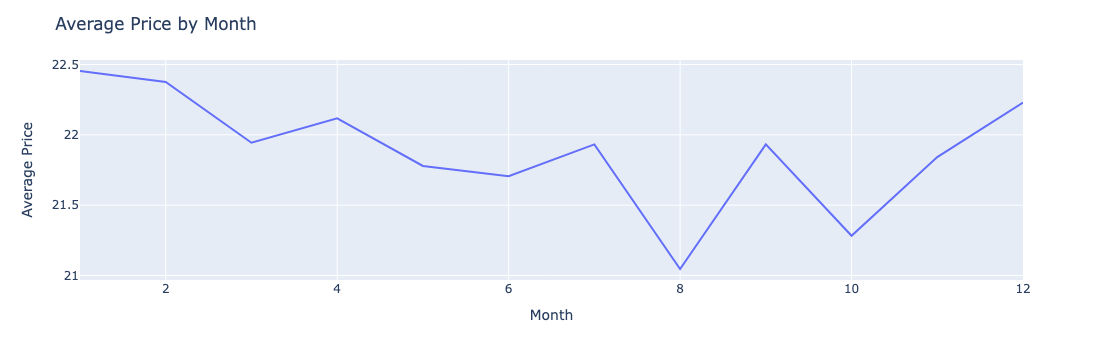

In [122]:
fig = px.line(price_by_month, x=price_by_month.index, y="price",)
fig.update_layout(
    yaxis_title="Average Price", 
    xaxis_title="Month",
    legend_title="", 
    title="Average Price by Month"
)
fig.show()

Though there are changes in average ratings across the different months of the year, across the year 2003-2023, the average hover between $21-23.

In [131]:
totalprice_by_month = timeseries.groupby(timeseries.index.month)['price'].sum()

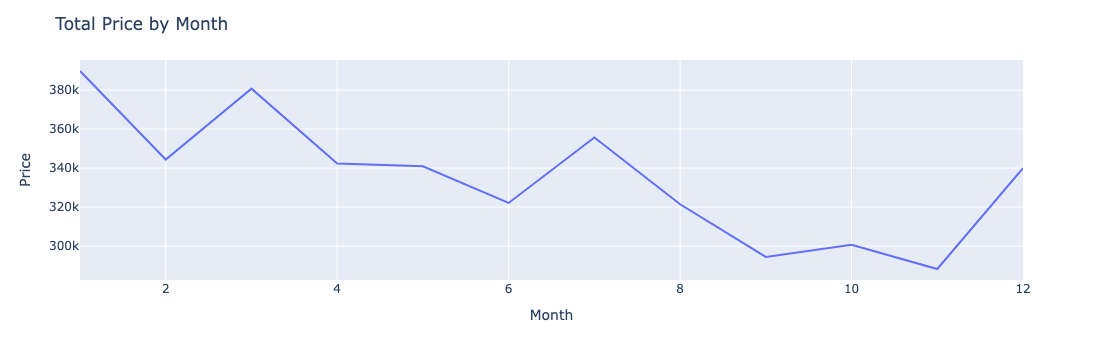

In [132]:
fig = px.line(totalprice_by_month, x=totalprice_by_month.index, y="price",)
fig.update_layout(
    yaxis_title="Price", 
    xaxis_title="Month",
    legend_title="", 
    title="Total Price by Month"
)
fig.show()

The total price of product that customers are looking in January seem to be highest and then taper off in the fall, and rise again starting the winter months. 

In [126]:
helpful_vote_by_month = timeseries.groupby(timeseries.index.month)['helpful_vote'].sum()

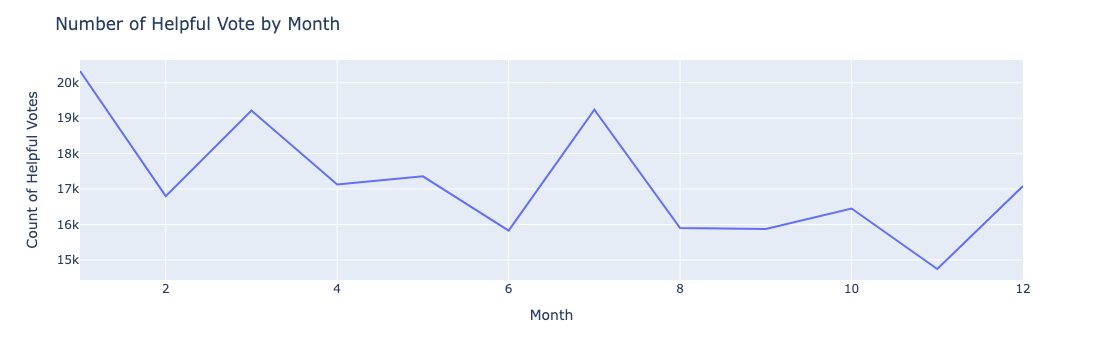

In [128]:
fig = px.line(helpful_vote_by_month, x=helpful_vote_by_month.index, y="helpful_vote",)
fig.update_layout(
    yaxis_title="Count of Helpful Votes ", 
    xaxis_title="Month",
    legend_title="", 
    title="Number of Helpful Vote by Month"
)
fig.show()

July, across year 2003-2023, seemed to have the highest number of reviews voted as helpful. 